x.shape=torch.Size([33, 1000, 64])
(x.shape, output.shape)=(torch.Size([33, 1000, 64]), torch.Size([33, 1000, 64]))


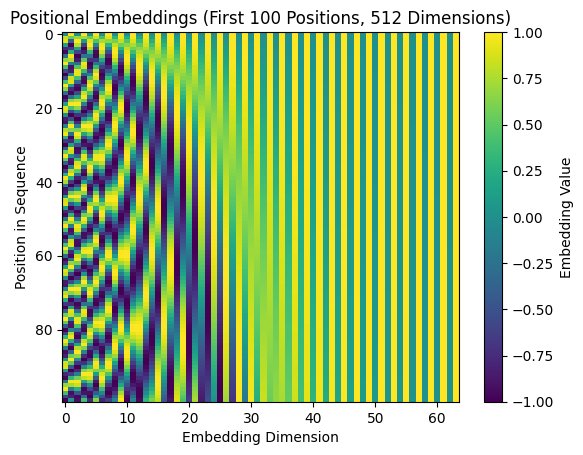

In [1]:
import importlib

import torch.nn.functional as F
import torch.nn as nn
import math
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import transformer
importlib.reload(transformer)
from transformer import *

    
model_dim = 64
batch_size = 33
nr_embeddings = 1000
attention = MultiHeadAttention(nr_heads=4, model_dim=model_dim, use_masked_attention=False)
x = torch.randn(batch_size, nr_embeddings, model_dim)
print(f'{x.shape=}')
output = attention(x)
print(f'{(x.shape, output.shape)=}')
assert x.shape == output.shape

plt.figure()

# Instantiate the positional embeddings
pos_embed_layer = PositionalEmbeddings(model_dim=model_dim, max_len=500)

# Extract the positional embeddings
pe = pos_embed_layer.pe[0].cpu().numpy()

# Plot the positional embeddings for the first 100 positions and all dimensions
plt.imshow(pe[:100, :], aspect='auto', cmap='viridis')
plt.colorbar(label='Embedding Value')
plt.xlabel('Embedding Dimension')
plt.ylabel('Position in Sequence')
plt.title('Positional Embeddings (First 100 Positions, 512 Dimensions)')
plt.show()

In [11]:
import requests

def get_shakespeare():
    # URL of the Shakespeare dataset from Andrej Karpathy's repository
    url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"

    # Download the dataset
    response = requests.get(url)
    data = response.text

    # Save the dataset to a local file
    with open("shakespeare.txt", "w") as file:
        file.write(data)

    print("Shakespeare dataset downloaded and saved as 'shakespeare.txt'.")

    # Read the dataset
    with open("shakespeare.txt", "r") as file:
        text = file.read()
    
    return text

# # Display the first 1000 characters of the dataset
# print(text[:1000])

# text="baba komp tenk auto deda komp tenk deda komp baba komp komp auto baba auto baba tenk tenk baba tenk auto tenk auto komp baba tenk deda baba komp deda komp komp deda baba tenk auto komp auto auto deda deda deda auto baba baba auto komp auto tenk auto deda baba auto komp deda deda auto deda deda deda baba deda deda deda deda tenk auto auto deda deda tenk komp auto deda komp komp tenk deda tenk baba auto auto auto baba deda deda baba tenk deda baba auto deda tenk deda tenk auto deda auto komp deda"
text="abcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabc"

import torch
from torch.utils.data import Dataset

class TextDataset(Dataset):
    def __init__(self, text, seq_length):
        self.text = text
        self.seq_length = seq_length

        self.all_tokens = set([c for c in text])
        self.int_to_token_txt = [None] * len(self.all_tokens)
        self.txt_token_to_int = [None] * 256
        self.nr_unique_tokens = len(self.all_tokens)

        for i, token in enumerate(self.all_tokens):
            self.int_to_token_txt[i] = token
            self.txt_token_to_int[ord(token)] = i

        tokens = [self.txt_token_to_int[ord(c)] for c in text]
        self.one_hot_text = self.tokens_ints_to_one_hot_tensor(tokens)

    def __len__(self):
        return len(text) // self.seq_length

    def __getitem__(self, idx):
        start = torch.randint(low=0, high=len(self.text)-self.seq_length, size=(1,))

        return self.one_hot_text[start:start+self.seq_length]
    

    def tokens_ints_to_one_hot_tensor(self, tokens : list[int]):

        nr_tokens = len(tokens)
        one_hot = torch.zeros(nr_tokens, self.nr_unique_tokens)

        for token_idx in range(nr_tokens):
            place_of_1 = tokens[token_idx]
            one_hot[token_idx][place_of_1] = 1

        return one_hot

# print('len(txt)=', len(text))
# txt_dataset = TextDataset(text[:1000], 4)


# CONTEXT_LENGTH = 100
# txt_dataset_complete = TextDataset(text, CONTEXT_LENGTH)

CONTEXT_LENGTH = 3
txt_dataset_complete = TextDataset(text, CONTEXT_LENGTH)

In [12]:
import transformer
importlib.reload(transformer)
from transformer import *

class NextTokenPredictionTransformer(torch.nn.Module):
    def __init__(self, nr_decoder_blocks, nr_heads, model_dim, max_input_tokens, txt_dataset):
        super().__init__()
        self.nr_unique_tokens = len(txt_dataset.all_tokens)
        self.txt_dataset = txt_dataset

        self.transformer = Transformer(nr_encoder_decoder_blocks=nr_decoder_blocks, nr_heads=nr_heads, model_dim=model_dim, max_input_tokens=max_input_tokens, nr_input_features=self.nr_unique_tokens, use_masked_attention=True)

        self.projection_to_token_vocab = nn.Linear(in_features=model_dim, out_features=self.nr_unique_tokens)
    
    def forward(self, token_tensor):
        output = self.transformer(token_tensor)
        output = self.projection_to_token_vocab(output)
        return output

txt_dataset = TextDataset(text[:CONTEXT_LENGTH*100], CONTEXT_LENGTH)
txt_dataloader = DataLoader(txt_dataset, batch_size=1, shuffle=True)
llm = NextTokenPredictionTransformer(nr_decoder_blocks=2, nr_heads=4, model_dim=128, max_input_tokens=CONTEXT_LENGTH, txt_dataset=txt_dataset)

for input in txt_dataloader:
    labels = input[:, 1:, :]
    output = llm(input)
    print(f'{(input.shape, labels.shape, output.shape)=}')
    assert labels.shape[1] == input.shape[1] - 1 and input.shape == output.shape
    break

(input.shape, labels.shape, output.shape)=(torch.Size([1, 3, 3]), torch.Size([1, 2, 3]), torch.Size([1, 3, 3]))


Finished Training


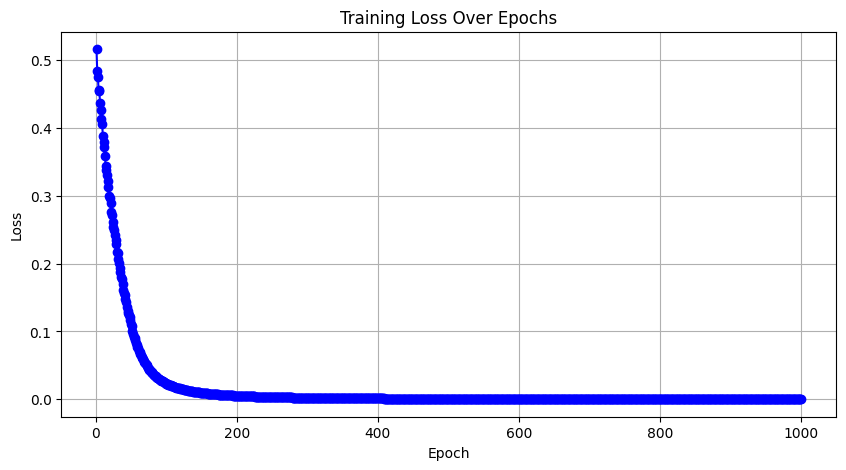

In [13]:
from tqdm import tqdm

txt_dataloader_complete = DataLoader(txt_dataset_complete, batch_size=256, shuffle=True)
llm = NextTokenPredictionTransformer(nr_decoder_blocks=2, nr_heads=2, model_dim=8, max_input_tokens=CONTEXT_LENGTH, txt_dataset=txt_dataset_complete)
criterion = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(llm.parameters(), lr=0.005)
optimizer = torch.optim.Adam(llm.parameters(), lr=1e-3)

loss_values = []
num_epochs = 1000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
llm.to(device)

for epoch in range(num_epochs):
    llm.train()
    running_loss = 0.0
    progress_bar = tqdm(txt_dataloader_complete, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
    for input in progress_bar:
        input = input.to(device)
        labels = input[:, 1:, :]

        optimizer.zero_grad()

        outputs = llm(input)
        outputs = outputs[:, :-1, :] # skip last prediction as we dont have its label

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=running_loss / (progress_bar.n + 1))
    
    epoch_loss = running_loss / len(txt_dataloader_complete)
    loss_values.append(epoch_loss)
    # Print epoch loss every 10% of the total number of epochs
    # if (epoch + 1) % (num_epochs // 10) == 0:
    #     print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

print('Finished Training')

# Plot the loss function graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [16]:
def one_hot_to_token(llm_model, one_hot):
    idx = torch.argmax(one_hot)
    return llm_model.txt_dataset.int_to_token_txt[idx]

def predict_next_token(llm_model, text : str, nr_predictions):
    llm_model.eval()

    print(text, end='|')

    with torch.no_grad():
        for i in range(nr_predictions):
            #             self.int_to_token_txt[i] = token
            # self.txt_token_to_int[ord(token)] = i
            if len(text) < CONTEXT_LENGTH-1:
                tokens = [llm_model.txt_dataset.txt_token_to_int[ord(c)] for c in text]
            else:
                tokens = [llm_model.txt_dataset.txt_token_to_int[ord(c)] for c in text[len(text)-CONTEXT_LENGTH+1:]]
                assert len(tokens) < CONTEXT_LENGTH
            assert None not in tokens

            one_hot = llm_model.txt_dataset.tokens_ints_to_one_hot_tensor(tokens)
            one_hot = one_hot.view(1, *one_hot.shape)
            output = llm_model(one_hot)
            next_token_logits = output[:, -1, :]
    
            # print(next_token_logits.view(-1))
            token = one_hot_to_token(llm_model, next_token_logits.view(-1))
            print(token, end='')
            text += token

    return text

# txt = "Very wel"
# txt = "Let us ki"
# txt = "We are accounted po"
# txt = "First Cit"
# txt = "abca"
txt = "abcabc"
# txt="p"
pred = predict_next_token(llm, txt, nr_predictions=100)
print()
print(pred)

abcabc|abcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabca
abcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabca
